# Part 1: word2vec embedding

In [17]:
import sys
sys.path.append("..")

In [18]:
# use Python 3 kernel if possible, idk why the env_214 wouldn't let us to download outside pkg..

# !pip install gensim
import gensim

In [19]:
import os
import pickle 
import numpy as np
from sklearn.model_selection import train_test_split
import gensim.downloader as api
from preprocessing import downsample_word_vectors, make_delayed

In [20]:
# set up path
data_path = "/ocean/projects/mth240012p/shared/data"
raw_text_path = os.path.join(data_path, "raw_text.pkl")
print(raw_text_path)

/ocean/projects/mth240012p/shared/data/raw_text.pkl


In [21]:
# ----- Data split -----

# load raw text
with open(raw_text_path, "rb") as f:
    raw_text = pickle.load(f)

# train/test split
story_names = list(raw_text.keys())
train_stories, test_stories = train_test_split(story_names, test_size=0.2, random_state=42)

In [22]:
# ----- 1. Generate embedding -----

# load pre-trained word2vec (GoogleNews, 300-D)
word2vec_model = api.load("word2vec-google-news-300")

# convert for all stories
word_vectors = {}  # dictionary: story -> (T, 300)
for story in story_names:
    words = raw_text[story].data
    vectors = []
    for word in words:
        if word in word2vec_model:
            vectors.append(word2vec_model[word])
        else:
            vectors.append(np.zeros(300))
    word_vectors[story] = np.vstack(vectors)
    print(f"{story}: Word2Vec shape = {word_vectors[story].shape}") # expected shape: (T, 300)

[--------------------------------------------------] 1.4% 23.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.3% 153.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========------------------------------------------] 17.1% 284.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============--------------------------------------] 25.0% 416.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================----------------------------------] 32.9% 547.8/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================------------------------------] 40.9% 679.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================--------------------------] 48.8% 811.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================----------------------] 56.7% 943.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================------------------] 64.6% 1074.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[====================================--------------] 72.5% 1206.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[========================================----------] 80.5% 1337.9/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================================------] 88.4% 1470.1/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================================--] 96.3% 1602.0/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)




sweetaspie: Word2Vec shape = (697, 300)
thatthingonmyarm: Word2Vec shape = (2073, 300)
tildeath: Word2Vec shape = (2297, 300)
indianapolis: Word2Vec shape = (1554, 300)
lawsthatchokecreativity: Word2Vec shape = (2084, 300)
golfclubbing: Word2Vec shape = (1211, 300)
jugglingandjesus: Word2Vec shape = (887, 300)
shoppinginchina: Word2Vec shape = (1731, 300)
cocoonoflove: Word2Vec shape = (1984, 300)
hangtime: Word2Vec shape = (1927, 300)
beneaththemushroomcloud: Word2Vec shape = (1916, 300)
dialogue4: Word2Vec shape = (1692, 300)
thepostmanalwayscalls: Word2Vec shape = (2220, 300)
stumblinginthedark: Word2Vec shape = (2681, 300)
kiksuya: Word2Vec shape = (1699, 300)
haveyoumethimyet: Word2Vec shape = (2985, 300)
theinterview: Word2Vec shape = (1079, 300)
againstthewind: Word2Vec shape = (838, 300)
tetris: Word2Vec shape = (1350, 300)
canplanetearthfeedtenbillionpeoplepart2: Word2Vec shape = (2532, 300)
alternateithicatom: Word2Vec shape = (2174, 300)
goldiethegoldfish: Word2Vec shape = 

In [25]:
# ----- 2. Downsaple and trim -----

wordseqs = raw_text
stories = train_stories + test_stories

def align_embeddings_with_fmri(stories, word_vectors, wordseqs, subject_path):
    """
    aligns Word2Vec embeddings with FMRI recordings.
    returns trimmed X and Y matched by timepoints.
    """
    # downsample the embeddings
    downsampled = downsample_word_vectors(stories, word_vectors, wordseqs)

    # trim the first 5 and last 10 seconds
    X_trimmed = {}
    Y_trimmed = {}

    for story in stories:
        bold_path = os.path.join(subject_path, f"{story}.npy")
        try:
            Y = np.load(bold_path)
            X = downsampled[story]

            # match shortest timepoints across both
            min_len = min(X.shape[0], Y.shape[0])

            X_trimmed[story] = X[:min_len, :]
            Y_trimmed[story] = Y[:min_len, :]

            print(f"{story}: aligned length = {min_len}")
        except FileNotFoundError:
            print(f"FMRI file for '{story}' not found, skipping.")
        except Exception as e:
            print(f"Error with {story}: {e}")
    
    return X_trimmed, Y_trimmed

In [24]:
subject_path = os.path.join(data_path, "subject2")
stories = train_stories + test_stories

X_trimmed, Y_trimmed = align_embeddings_with_fmri(stories, word_vectors, raw_text, subject_path)

theadvancedbeginner: aligned length = 318
superheroesjustforeachother: aligned length = 325
seedpotatoesofleningrad: aligned length = 281
mayorofthefreaks: aligned length = 475
adollshouse: aligned length = 241
cautioneating: aligned length = 279
haveyoumethimyet: aligned length = 496
ifthishaircouldtalk: aligned length = 249
myfathershands: aligned length = 170
thecurse: aligned length = 407
hangtime: aligned length = 324
breakingupintheageofgoogle: aligned length = 521
theclosetthatateeverything: aligned length = 314
leavingbaghdad: aligned length = 327
FMRI file for 'myfirstdaywiththeyankees' not found, skipping.
itsabox: aligned length = 355
golfclubbing: aligned length = 201
odetostepfather: aligned length = 404
gpsformylostidentity: aligned length = 326
exorcism: aligned length = 467
waitingtogo: aligned length = 349
theinterview: aligned length = 221
FMRI file for 'dialogue6' not found, skipping.
forgettingfear: aligned length = 237
FMRI file for 'dialogue5' not found, skipping.

In [27]:
# ----- 3. Create lagged versons of the features

# apply make_delayed to all stories in X_trimmed
X_w2v_lagged = {}

for story in X_trimmed:
    try:
        X_w2v_lagged[story] = make_delayed(X_trimmed[story], delays=[1, 2, 3, 4])
        print(f"{story}: lagged shape = {X_w2v_lagged[story].shape}")
    except Exception as e:
        print(f"Error for {story}: {e}") # expected shape: (T, 1200)

theadvancedbeginner: lagged shape = (318, 1200)
superheroesjustforeachother: lagged shape = (325, 1200)
seedpotatoesofleningrad: lagged shape = (281, 1200)
mayorofthefreaks: lagged shape = (475, 1200)
adollshouse: lagged shape = (241, 1200)
cautioneating: lagged shape = (279, 1200)
haveyoumethimyet: lagged shape = (496, 1200)
ifthishaircouldtalk: lagged shape = (249, 1200)
myfathershands: lagged shape = (170, 1200)
thecurse: lagged shape = (407, 1200)
hangtime: lagged shape = (324, 1200)
breakingupintheageofgoogle: lagged shape = (521, 1200)
theclosetthatateeverything: lagged shape = (314, 1200)
leavingbaghdad: lagged shape = (327, 1200)
itsabox: lagged shape = (355, 1200)
golfclubbing: lagged shape = (201, 1200)
odetostepfather: lagged shape = (404, 1200)
gpsformylostidentity: lagged shape = (326, 1200)
exorcism: lagged shape = (467, 1200)
waitingtogo: lagged shape = (349, 1200)
theinterview: lagged shape = (221, 1200)
forgettingfear: lagged shape = (237, 1200)
shoppinginchina: lagged

# Part2: Modeling

In [37]:
# ----- Stack training data -----
X_train = []
Y_train = []

for story in train_stories:
    if story in X_w2v_lagged and story in Y_trimmed:
        X_train.append(X_w2v_lagged[story])
        Y_train.append(Y_trimmed[story])

X_train = np.vstack(X_train)
Y_train = np.vstack(Y_train)

print(f"Before NaN removal: X_train {X_train.shape}, Y_train {Y_train.shape}")

# ----- Remove NaNs from Y_train -----
# Create mask for rows with no NaN values in Y
mask = ~np.isnan(Y_train).any(axis=1)

# Apply the mask to both X and Y
X_train_clean = X_train[mask]
Y_train_clean = Y_train[mask]

print(f"After NaN removal: X_train {X_train_clean.shape}, Y_train {Y_train_clean.shape}")

# ----- Fit Ridge regression -----
from sklearn.linear_model import Ridge
import pickle
import os

ridge = Ridge(alpha=100.0)
ridge.fit(X_train_clean, Y_train_clean)

# Go up one level from 'code/' to reach 'results/'
save_dir = os.path.join("..", "results")
os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, "ridge_word2vec_subject2.pkl")

with open(model_path, "wb") as f:
    pickle.dump(ridge, f)

print(f"Model saved to: {model_path}")


Before NaN removal: X_train (28644, 1200), Y_train (28644, 94251)
After NaN removal: X_train (27867, 1200), Y_train (27867, 94251)
Model saved to: ../results/ridge_word2vec_subject2.pkl


In [39]:
# ----- Evaluate on test set -----

def compute_cc(y_true, y_pred):
    cc_vals = []
    for v in range(y_true.shape[1]):  # for each voxel
        cc, _ = pearsonr(y_true[:, v], y_pred[:, v])
        cc_vals.append(cc)
    return np.array(cc_vals)

X_test = []
Y_test = []

for story in test_stories:
    if story in X_w2v_lagged and story in Y_trimmed:
        X_test.append(X_w2v_lagged[story])
        Y_test.append(Y_trimmed[story])

X_test = np.vstack(X_test)
Y_test = np.vstack(Y_test)

Y_pred = ridge.predict(X_test)

ccs = compute_cc(Y_test, Y_pred)

print(f"Mean CC: {np.mean(ccs):.4f}")
print(f"Median CC: {np.median(ccs):.4f}")
print(f"Top 1% CC: {np.percentile(ccs, 99):.4f}")
print(f"Top 5% CC: {np.percentile(ccs, 95):.4f}")


Mean CC: 0.0039
Median CC: 0.0036
Top 1% CC: 0.0410
Top 5% CC: 0.0284


Plot saved to: ../results/cc_distribution_word2vec_subject2_pretty.png


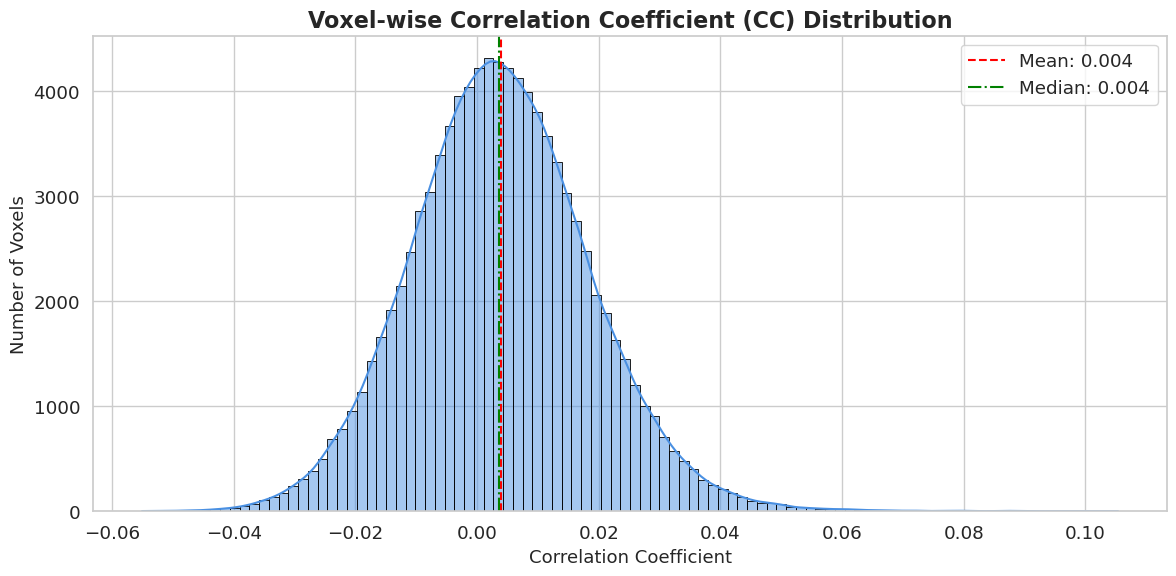

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Remove NaNs
valid_ccs = ccs[~np.isnan(ccs)]

# Set plot style
sns.set(style="whitegrid", font_scale=1.2)

# Create figure
plt.figure(figsize=(12, 6))

# Plot histogram
sns.histplot(valid_ccs, bins=100, kde=True, color="#4A90E2", edgecolor="black", stat="count")

# Add vertical lines for mean and median
plt.axvline(np.mean(valid_ccs), color='red', linestyle='--', label=f"Mean: {np.mean(valid_ccs):.3f}")
plt.axvline(np.median(valid_ccs), color='green', linestyle='-.', label=f"Median: {np.median(valid_ccs):.3f}")

# Titles and labels
plt.title("Voxel-wise Correlation Coefficient (CC) Distribution", fontsize=16, weight="bold")
plt.xlabel("Correlation Coefficient", fontsize=13)
plt.ylabel("Number of Voxels", fontsize=13)
plt.legend()
plt.tight_layout()

save_dir = os.path.join("..", "results")
os.makedirs(save_dir, exist_ok=True)

plot_path = os.path.join(save_dir, "cc_distribution_word2vec_subject2_pretty.png")
plt.savefig(plot_path, dpi=300)

print(f"Plot saved to: {plot_path}")
